In [1]:
import json 
from collections import defaultdict
from operator import mod
import os

import matplotlib 
import matplotlib.pyplot as plt 
import statistics



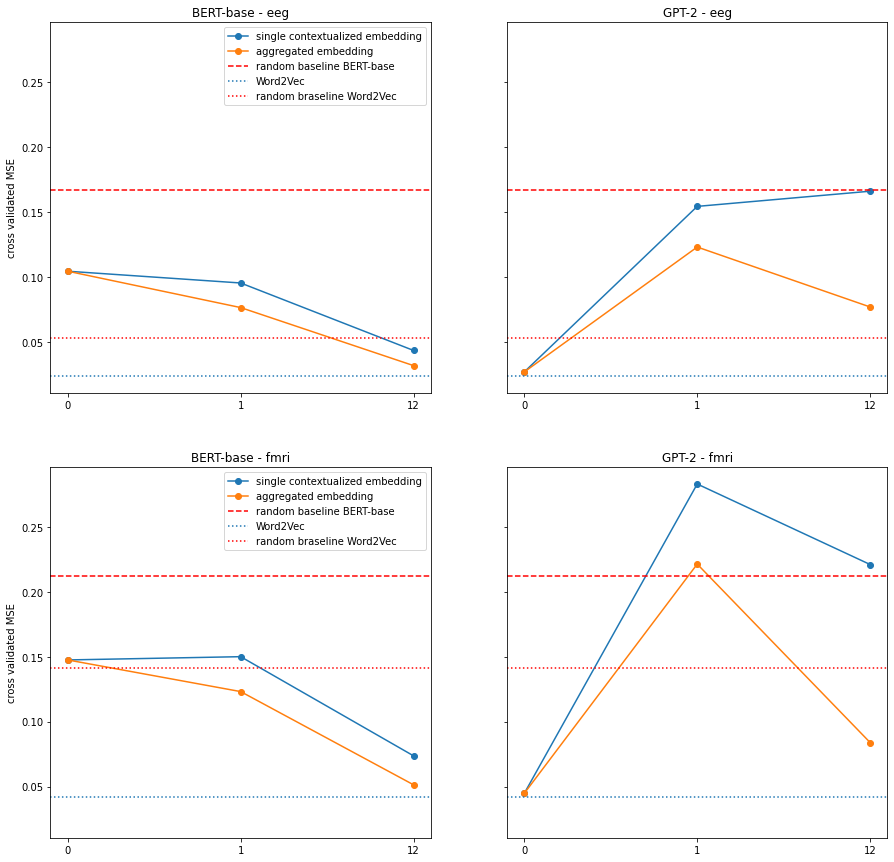

In [18]:
results = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

for modality in ['eeg', 'fmri']:
    path = f'results/decontext/experiments/{modality}'
    for dataset in os.listdir(path):
        if dataset == 'options_1.json':
            continue
        path = f'results/decontext/experiments/{modality}/{dataset}/ALL_DIM'
        for embedding in os.listdir(path):
            result_file_path = os.path.join(path, embedding, '1', embedding + '.json')
            result_file = open(result_file_path, 'r')
            avg_mse = json.load(result_file)['AVERAGE_MSE']

            split = embedding.split('.')
            model = split[0]
            n_context = ''
            layer = ''
            if model == 'bert':
                layer = split[2]
                n_context = split[3]
            elif model == 'gpt2':
                layer = split[1]
                n_context = split[2]

            results[modality][model][n_context][layer].append(avg_mse)

fig, axes = plt.subplots(2,2, sharey=True, figsize=(15,15))
for i, modality in enumerate(results.items()):
    modality, modality_results = modality
    axes[i][0].plot(['0', '1', '12'], [statistics.mean(modality_results['bert']['1']['0']), statistics.mean(modality_results['bert']['1']['1']), statistics.mean(modality_results['bert']['1']['12'])], label='single contextualized embedding', marker='o')
    axes[i][0].plot(['0', '1', '12'], [statistics.mean(modality_results['bert']['1']['0']), statistics.mean(modality_results['bert']['all']['1']), statistics.mean(modality_results['bert']['all']['12'])], label='aggregated embedding', marker='o')
    axes[i][0].axhline(statistics.mean(modality_results['random-768-10_for_bert']['']['']), label='random baseline BERT-base', linestyle='--', c='red')
    axes[i][0].axhline(statistics.mean(modality_results['own_word2vec']['']['']), label='Word2Vec', linestyle='dotted')
    axes[i][0].axhline(statistics.mean(modality_results['random-300-10_for_own_word2vec']['']['']), label='random braseline Word2Vec', linestyle='dotted', c='red')
    axes[i][0].set_title(f'BERT-base - {modality}')
    axes[i][0].set_ylabel('cross validated MSE')

    axes[i][1].plot(['0', '1', '12'], [statistics.mean(modality_results['gpt2']['1']['0']), statistics.mean(modality_results['gpt2']['1']['1']), statistics.mean(modality_results['gpt2']['1']['12'])], label='single contextualized embedding', marker='o')
    axes[i][1].plot(['0', '1', '12'], [statistics.mean(modality_results['gpt2']['1']['0']), statistics.mean(modality_results['gpt2']['all']['1']), statistics.mean(modality_results['gpt2']['all']['12'])], label='aggregated embedding', marker='o')
    axes[i][1].axhline(statistics.mean(modality_results['random-768-10_for_bert']['']['']), label='random baseline GPT-2', linestyle='--', c='red')
    axes[i][1].axhline(statistics.mean(modality_results['own_word2vec']['']['']), label='Word2Vec', linestyle='dotted')
    axes[i][1].axhline(statistics.mean(modality_results['random-300-10_for_own_word2vec']['']['']), label='random braseline Word2Vec', linestyle='dotted', c='red')

    axes[i][1].set_title(f'GPT-2 - {modality}')

    axes[i][0].legend()

plt.savefig('cognival.pdf', bbox_inches='tight')

In [7]:
results

defaultdict(<function __main__.<lambda>()>,
            {'eeg': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'random-300-10_for_own_word2vec': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'': defaultdict(list,
                                                   {'': [0.01197785914025006,
                                                     0.10618087093549403,
                                                     0.07174411045418436,
                                                     0.02287939605413017]})}),
                          'bert': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'all': defaultdict(list,
                                                   {'1': [0.019526220382865982,
                                                     0.13154138598592832,
                                    